<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/Best_Practices_for_Model_Evalutation_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning about the Pipeline Class in scikit learn**

## **Loading Data- Breast Cancer Wisconsin Dataset**

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)

## **Transform M, B (malignent, benign) to integers and featurs into X data**

In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['M', 'B'])

array([1, 0])

## **Split dataset into training and test dataset**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    stratify = y , 
                                                    random_state = 1)

## **Standardize the Scale of the features in the dataset, Compress the 30 - dimensions into a lower two-dimensional subspace, then feed into Logistic Regression Model**

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


### **Pipeline is Wrapper or meta-estimator. If we want to use pipeline for prediction then last pipeline element has to be an estimator**

### **If we feed dataset to predict call of Pipeline object instance, data will pass through intermediate steps via transform calls, in final step estimator object will then return a prediction on transformed data**

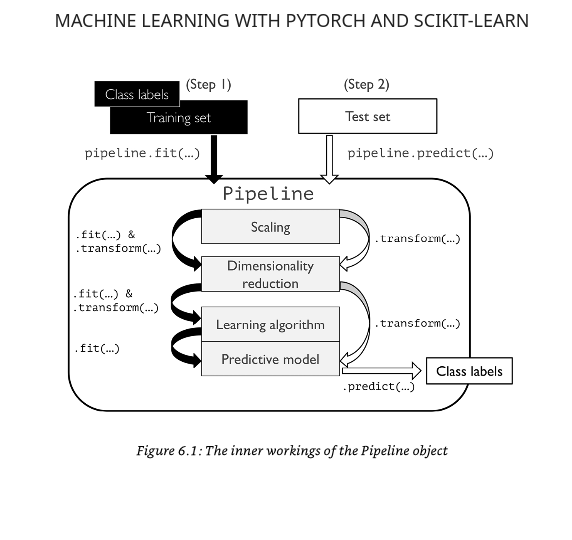

# **Cross-Validation Techniques**

## **Holdout Method**

### **Model Selection - select optimal values of tuning parameters (hyperparameters).** 

### **Reusing test dataset over and over in model selection will increase chance of overfit, best way to use Holdout method is to separate data into Training dataset, Validation dataset, Test Dataset**

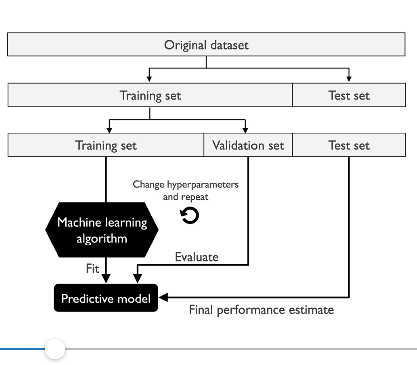

### **Disadvantage of holdout is preformance may be sensitive to how we partition dataset into training and validation**

## **K-fold cross-validation**

### **Split training data into k folds for model training and one fold as test fold. procedure repeated k times**

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)
scores = []
for k, (train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f'Fold: {k+1:02d}, ' f'Class distr.: {np.bincount(y_train[train])}, ' f'Acc.: {score:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956


In [8]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +\- {std_acc:.3f}')


CV accuracy: 0.950 +\- 0.014


### **cross-validation scorer using Scikit-learn**

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = pipe_lr,
                         X=X_train,
                         y = y_train,
                         cv = 10,
                         n_jobs = 1)
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


### **Can use n_jobs parameter to distribute fold evaluation across multiple cpus on machine**

# **Debugging algorithms with learning and validation curves**

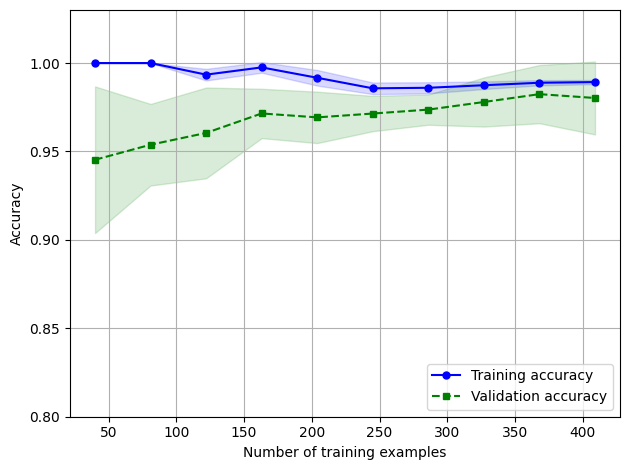

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(penalty = 'l2',max_iter=10000))
                                                             
train_sizes, train_scores, test_scores = learning_curve(estimator = pipe_lr,
                                                        X=X_train,
                                                        y = y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue',marker='o',
         markersize=5,label='Training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle = '--',
         marker='s', markersize=5, label = 'Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color = 'green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [11]:
hex(12)

'0xc'

## **Validation Curve**

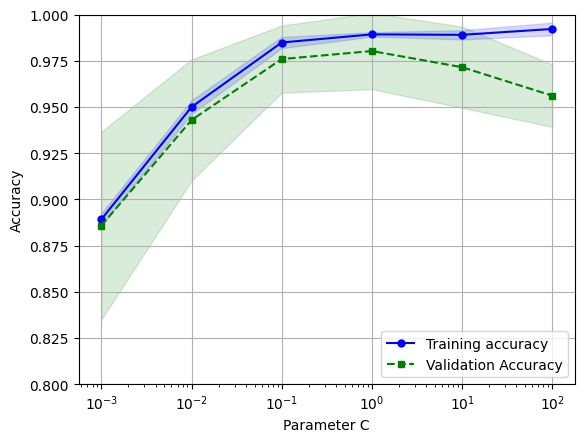

In [12]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator = pipe_lr,
                                             X=X_train,
                                             y = y_train,
                                             param_name = 'logisticregression__C',
                                             param_range=param_range,
                                             cv=10)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean, color= 'blue', marker = 'o',
         markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha = 0.15,
                 color = 'blue')
plt.plot(param_range, test_mean, color='green', linestyle = '--',
         marker = 's', markersize = 5,
         label = 'Validation Accuracy')
plt.fill_between(param_range, test_mean + test_std,
                 test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

## **Grid Search - Brute force technique where we set values of hyperparameters and the computer evaluates performance for each combination**

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state = 1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range,
               'svc__kernel':['rbf']
              }]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


## **Test the best params found from grid search on our test dataset via the best_estimator_ attribute of GridSearchCV**

In [14]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test Accuracy: {clf.score(X_test,y_test):.3f}')

Test Accuracy: 0.974


### **Fitting model on training set manually is not necessary. GridSearchCV has refit parameter which will refit the gs.best_estimator_ to whole training set if we set (refit=True)**

## **Randomized search- grid search can be expensive so an alternative is randomized search where the hyperparamters are selected randomly from distributions. **

In [15]:
import scipy.stats
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#can substitute the above list with bottom list
param_range = scipy.stats.loguniform(0.0001, 1000.0)
#loguniform ensures same number of samples are chosen from 0.0001 to .001 as from
# 10.0 to 100.0
np.random.seed(1)
param_range.rvs(10)
# selects 10 samples rvs(10)


array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

## **Randomized search in action with SVM**

In [16]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

param_grid = [{'svc__C': param_range, 'svc__kernel' : ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
rs = RandomizedSearchCV(estimator=pipe_svc, param_distributions = param_grid,
                        scoring='accuracy', refit = True, n_iter = 20,
                        cv=10, random_state=1, n_jobs = -1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9780676328502416
{'svc__C': 0.05971247755848464, 'svc__kernel': 'linear'}


## **Succesive Halving - more resource efficient hyperparameter search. Can use it with Random search and grid search**

In [17]:
from sklearn.experimental import enable_halving_search_cv
# halving search still experimental in scikit-learn have to enable it

from sklearn.model_selection import HalvingRandomSearchCV

hs = HalvingRandomSearchCV(pipe_svc, param_distributions=param_grid,
                           n_candidates = 'exhaust',
                           resource='n_samples',
                           factor = 1.5,
                           random_state = 1,
                           n_jobs = -1)

hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)
clf=hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

0.9617647058823529
{'svc__C': 4.934834261073341, 'svc__kernel': 'linear'}
Test accuracy: 0.982


## **Nested Cross Validation - below is a 5x2 cross validation**

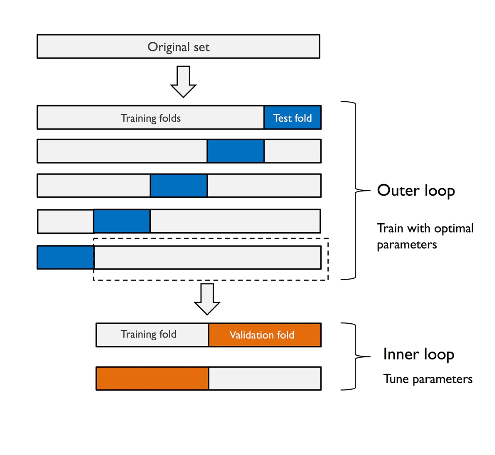

In [18]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0 ]
param_grid = [{'svc__C': param_range, 'svc__kernel':['linear']},
              {'svc__C': param_range, 'svc__gamma':param_range,
               'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv = 2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} ' f'+/- {np.std(scores):.3f}')

CV accuracy: 0.974 +/- 0.015


### **Compare cross-validation to decision tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth' :[1,2,3,4,5,6,7,None]}],
                  scoring = 'accuracy',
                  cv = 2)
scores = cross_val_score(gs, X_train, y_train, scoring = 'accuracy',
                         cv = 5)
print(f'CV accuracy: {np.mean(scores):.3f} ' f'+/- {np.std(scores):.3f}')

CV accuracy: 0.934 +/- 0.016


### **We can see that cross-validation performance of the SVM performed better than the decision tree  97.4% vs 93.4%**

# **Some other performance metrics besides prediction accuracy are precision, recall, the F1 score, and Matthews correlation coefficient (MCC).**

# **Confusion Matrix- performance of learning algorithm - consists of true positive (TP), true negative(TN), false positive(FP), and false negative(FN)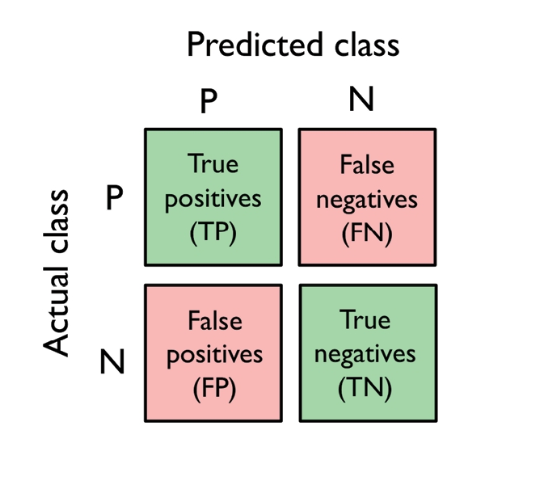**

In [20]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print (confmat)

[[71  1]
 [ 2 40]]


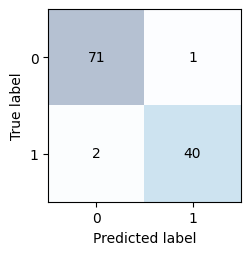

In [21]:
fig, ax, = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap= plt.cm.Blues, alpha = 0.3)
for i in range (confmat.shape[0]):
  for j in range (confmat.shape[1]):
    ax.text(x=j, y = i, s =confmat[i,j],
            va = 'center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **PRE, REC, F1, and MCC are ways of scoring the confusion matrix and are implimented in the scikit-learn library**

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test,
                          y_pred=y_pred)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred)

print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

Precision: 0.976
Recall: 0.952
F1: 0.964
MCC: 0.943


### **A positive class in scikit learn is labeled as 1. If we want to construct out own scorer we can use make_scorer function in scikit-learn. Example using gridsearchcv and f1_score below**

In [26]:
from sklearn.metrics import make_scorer
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range, 'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range, 'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

print(gs.best_params_)


0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


# **Plotting a Receiver Operating Characteristic**

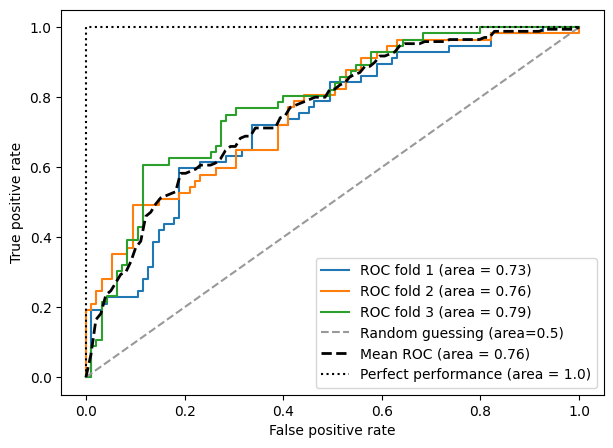

In [29]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression(penalty = 'l2',
                                           random_state = 1,
                                           solver='lbfgs',
                                           C=100.0))
X_train2 = X_train[:, [4,14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig= plt.figure(figsize = (7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train, test) in enumerate(cv):
  probas = pipe_lr.fit(X_train2[train], y_train[train]
                       ).predict_proba(X_train2[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1],
                                   pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr,
           label = f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0,1], [0,1], linestyle = '--',color = (0.6,0.6,0.6),
         label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label = f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0,0,1], [0,1,1], linestyle = ':', color = 'black',
         label = 'Perfect performance (area = 1.0)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

# **Scoring Metrics for Multiclass Classification**

In [30]:
# average parameter via sklearn.metrics

pre_scorer = make_scorer(score_func=precision_score, pos_label=1,
                         greater_is_better=True, average='micro')


## **Class imbalance is common in real world data. One example is when one class is over represented. If 90% of the patients were healthy, then we could get 90% accuracy just by predicting every patient healthy(benign)**

## **Creating Imbalanced Dataset**

In [32]:
X_imb = np.vstack((X[y==0], X[y ==1][:40]))
y_imb = np.hstack((y[y == 0], y[y==1][:40]))

#take 357 benign tumors and stack with 40 malignant examples

In [33]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb)*100

89.92443324937027

### **Dealing with imbalance- one way is to increase the penalty for wrong predictions. In Scikit learn you can set class_weight parameter to class_weight='balanced'**

### **Another way is scikit learns resample function that can help by upsampling the minority class**

In [34]:
from sklearn.utils import resample
print('Number of class 1 examples before:',
      X_imb[y_imb == 1].shape[0])
X_upsampled, y_upsampled = resample(X_imb[y_imb ==1],
                                    y_imb[y_imb == 1],
                                    replace = True,
                                    n_samples = X_imb[y_imb == 0].shape[0],
                                    random_state = 123)
print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


### **Stack original class 0 samples with upsampled class 1 subset**

In [36]:
X_bal = np.vstack((X[y==0],X_upsampled))
y_bal = np.hstack((y[y==0],y_upsampled))

y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred==y_bal)*100
# majority vote prediction would only be 50% accurate

50.0

### **Could downsample the majority class with resample also. swap class 1 label wth class 0 in previous code. Can also generate synthetic training examples using algorithms like SMOTE**